# Gradient Descent Practice

Gradient Descent is the core numerical optimization technique that is used in Machine Learning. In this practice we are going to code the Gradient Descent Algorithm and use it on 1D and 2D functions.

Exactly the same way it works with higher dimensional functions with the only exception that it is impossible to visualize the process.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import json_tricks

answer = {}

# Task 1. Code Gradient Descent algorith.

The inputs into your function are:
- current position $\mathbf x$, `x`
- gradient of the objective function $\nabla L$, `grad`
- learning rate $\alpha$

Code the update step of Gradient Descent algorithm.

In [31]:
def grad_descent(x, grad, alpha=0.1):
    res = x-alpha*grad
    return res

# Task 2. Code Objective Function

We will use a super simple objective function:

$f(x) = x^2$

Code this function and its gradient below.

In [32]:
def f_1d(x):
    res = x**2
    return res

def grad_f_1d(x):
    res = 2 * x
    return res


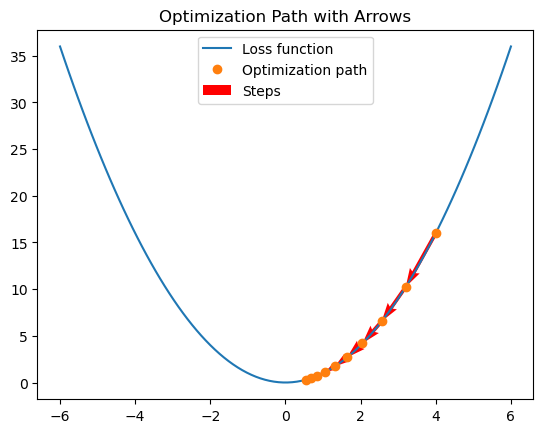

In [33]:
position = 5

history = []
for index in range(10):
    grad = grad_f_1d(position)
    position = grad_descent(position, grad)
    history.append(position)

xs = np.linspace(-6, 6, 100)
ys = f_1d(xs)

history = np.array(history)

plt.plot(xs, f_1d(xs), label="Loss function")
plt.plot(history, f_1d(history), 'o', label="Optimization path")
dx = np.diff(history)  # Change in x
dy = np.diff(f_1d(history))       # Change in y
plt.quiver(history[:-1], f_1d(history)[:-1], dx, dy, angles="xy", scale_units="xy", scale=1, color="red", label="Steps")

plt.legend()
plt.title("Optimization Path with Arrows")
plt.show()

answer['1d'] = history.tolist()

# Task 3. 2D optimization

The simple test case is passed. Let us take a look at a 2D function and how is it going to be optimized.

In this case we will be optimizing a slightly more sophisticated function:

$f(x, y) = (1 - x)^2 + 10 (y - x^2)^2$

Note that in this case, the input in loss function is a 2D point with coordinates:

```
numpy.array([1, 2])
```

Write a function that calculates the objective function and its gradient

In [34]:
def loss_2d(x):
    res = (1-x[0])**2+10*(x[1]-x[0]**2)**2
    return res

def loss_2d_grad(x):
    grad=np.array([-2*(1-x[0])-40*x[0]*(x[1]-x[0]**2),20*(x[1]-x[0]**2)])
    
    return grad

/tmp/ipykernel_46916/2533173052.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xs, ys, loss_2d(np.stack([xs, ys])), label="Loss function", levels=np.logspace(0, 3, 20))


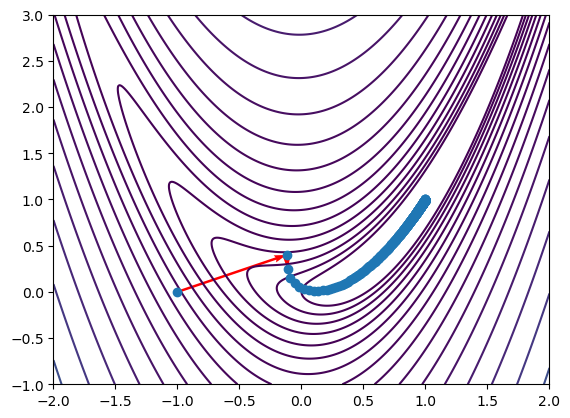

In [35]:
position = np.array([-1, 0])

history = [position]
for index in range(1000):
    grad = loss_2d_grad(position)
    position = grad_descent(position, grad, alpha=0.02)
    history.append(position)

xs = np.linspace(-2, 2, 400)
ys = np.linspace(-1, 3, 400)

xs, ys = np.meshgrid(xs, ys)

history = np.array(history)

plt.contour(xs, ys, loss_2d(np.stack([xs, ys])), label="Loss function", levels=np.logspace(0, 3, 20))
x, y = history[:, 0], history[:, 1]
dx = np.diff(x)
dy = np.diff(y)
plt.quiver(x[:-1], y[:-1], dx, dy, angles="xy", scale_units="xy", scale=1, color="red", width=0.005)
plt.plot(x, y, 'o', label="Optimization path")

answer['2d'] = history.tolist()

# Afterword

That is really impressive! We have coded one of the two main algorithms in Deep Learning: a Gradient Descent!

- How does the gradient descent work? Is its behavior logical?
- Which of the steps can potentially be dangerous?
- How would you improve Gradient Descent so that there is no that unwanted dangerous step?


In [36]:
json_tricks.dump(answer, '.answer.json')

'{"1d": [4.0, 3.2, 2.56, 2.048, 1.6384, 1.31072, 1.0485760000000002, 0.8388608000000002, 0.6710886400000001, 0.5368709120000001], "2d": [[-1.0, 0.0], [-0.12, 0.4], [-0.11221759999999999, 0.24576000000000003], [-0.08866126778638186, 0.152493115899904], [-0.05537344322003818, 0.0946401977021378], [-0.017215118734130223, 0.0580106059068998], [0.02267863994279562, 0.03492490766935196], [0.06239580259458718, 0.021160672885473162], [0.10076190294832406, 0.014253698203852975], [0.13706198529079838, 0.012613403356618775], [0.1709026845353186, 0.015082437138713278], [0.2021353371087118, 0.020732553315779417], [0.2307953601566852, 0.028783009792688673], [0.25704300531763424, 0.03857640518355482], [0.2811074285625667, 0.04957428574322143], [0.303240892426225, 0.061353126003156275], [0.32368745564243334, 0.07359389113767512], [0.34266598095619716, 0.08606576225871397], [0.360364124200853, 0.09860744715709753], [0.376939056515644, 0.11110938909867765], [0.39252134753975354, 0.12349885438996815], [0